In [244]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import mode
from scipy.stats import ttest_ind

%matplotlib inline

In [245]:
file = 'case1.xlsx'
sheet = case.parse('Заказы')
sheet.head(10)

,Номер заказа,Вес груза,День,Количество коробок,Город отправки,Город доставки
0,22,1122.21,1,157,Таллин,Санкт-Петербург
1,37,1110.50,1,148,Рига,Санкт-Петербург
2,64,1165.27,1,153,Москва,Рига
3,95,1157.63,1,153,Таллин,Санкт-Петербург
4,105,1000.52,1,145,Вильнюс,Санкт-Петербург
5,184,1110.26,1,154,Рига,Санкт-Петербург
6,194,1030.81,1,140,Рига,Санкт-Петербург
7,277,1093.69,1,139,Хельсинки,Санкт-Петербург
8,473,1025.65,1,129,Таллин,Санкт-Петербург
9,586,1001.96,1,140,Хельсинки,Москва


In [246]:
sheet[sheet['День'].isin(['1'])]

,Номер заказа,Вес груза,День,Количество коробок,Город отправки,Город доставки
0,22,1122.21,1,157,Таллин,Санкт-Петербург
1,37,1110.50,1,148,Рига,Санкт-Петербург
2,64,1165.27,1,153,Москва,Рига
3,95,1157.63,1,153,Таллин,Санкт-Петербург
4,105,1000.52,1,145,Вильнюс,Санкт-Петербург
5,184,1110.26,1,154,Рига,Санкт-Петербург
6,194,1030.81,1,140,Рига,Санкт-Петербург
7,277,1093.69,1,139,Хельсинки,Санкт-Петербург
8,473,1025.65,1,129,Таллин,Санкт-Петербург
9,586,1001.96,1,140,Хельсинки,Москва


In [247]:
print('В первый день:')
sheet[sheet['День'] == 1].sum()

В первый день:


Номер заказа                                                       9113
Вес груза                                                       20877.6
День                                                                 19
Количество коробок                                                 2791
Город отправки        ТаллинРигаМоскваТаллинВильнюсРигаРигаХельсинки...
Город доставки        Санкт-ПетербургСанкт-ПетербургРигаСанкт-Петерб...
dtype: object

In [250]:
data = sheet[['Номер заказа', 'Вес груза', 'День', 'Количество коробок']]
data.agg([np.min, np.max, np.mean, np.var, np.std, np.median, mode])

,Номер заказа,Вес груза,День,Количество коробок
amin,1.000000,823.520000,1.000000,113.000000
amax,1300.000000,1375.520000,30.000000,182.000000
mean,650.500000,1132.855008,15.736154,150.870769
var,140941.666667,8433.799269,74.559277,103.995604
std,375.421985,91.835719,8.634771,10.197823
median,650.500000,1136.450000,15.000000,151.000000
mode,22.000000,1157.630000,29.000000,154.000000


In [251]:
sheet.describe() 

,Номер заказа,Вес груза,День,Количество коробок
count,1300.000000,1300.000000,1300.000000,1300.000000
mean,650.500000,1132.855008,15.736154,150.870769
std,375.421985,91.835719,8.634771,10.197823
min,1.000000,823.520000,1.000000,113.000000
25%,325.750000,1067.890000,8.000000,144.000000
50%,650.500000,1136.450000,15.000000,151.000000
75%,975.250000,1195.805000,23.000000,158.000000
max,1300.000000,1375.520000,30.000000,182.000000


In [252]:
sheet.quantile([.10, .25, .50, .75], axis = 0) 

,Номер заказа,Вес груза,День,Количество коробок
0.10,130.90,1011.206,4.0,138.0
0.25,325.75,1067.890,8.0,144.0
0.50,650.50,1136.450,15.0,151.0
0.75,975.25,1195.805,23.0,158.0


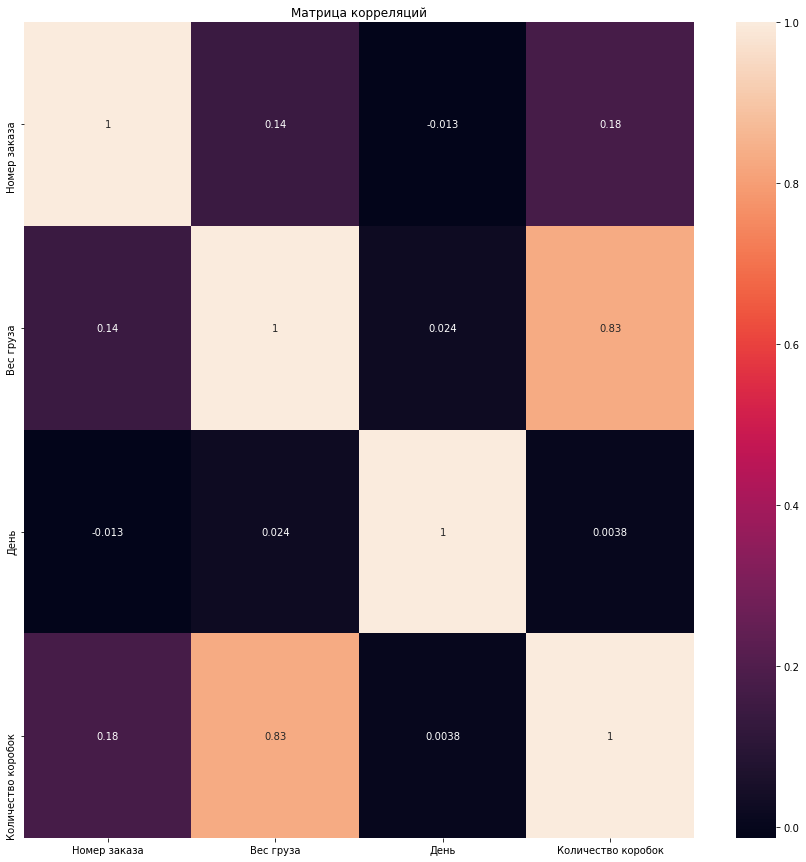

In [253]:
plt.figure(figsize=(15, 15))
sns.heatmap(sheet.corr(), annot=True)
plt.title('Матрица корреляций')
plt.show()

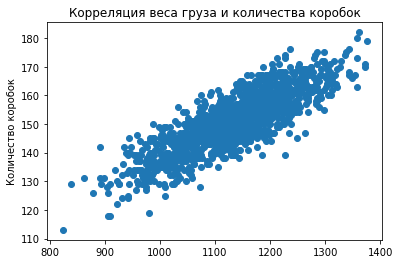

In [254]:
plt.scatter(sheet['Вес груза'], sheet['Количество коробок'])
plt.title('Корреляция веса груза и количества коробок')
plt.ylabel('Количество коробок')
plt.show()

In [255]:
cargoweight = sheet['Вес груза']
boxesnumber = sheet['Количество коробок']
corr = boxesnumber.corr(cargoweight)
print('Коэффициент Пирсона =', corr)

Коэффициент Пирсона = 0.8325170657126871


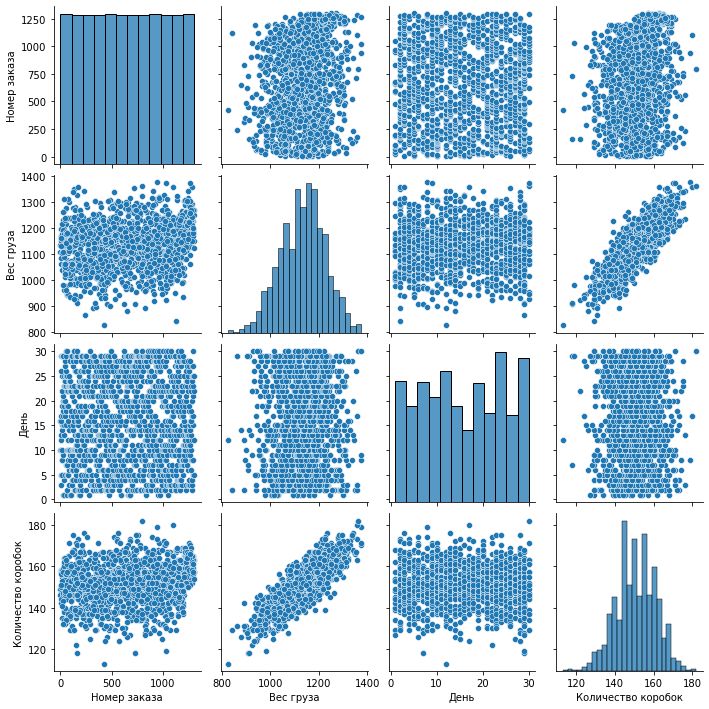

In [256]:
sns.pairplot(sheet) #матрица ковариаций попарно

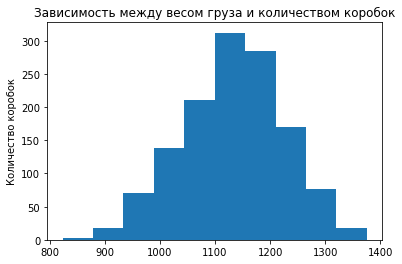

In [257]:
data = sheet['Количество коробок']
plt.hist(sheet['Вес груза'])
plt.ylabel('Количество коробок')
plt.title('Зависимость между весом груза и количеством коробок')
plt.show()

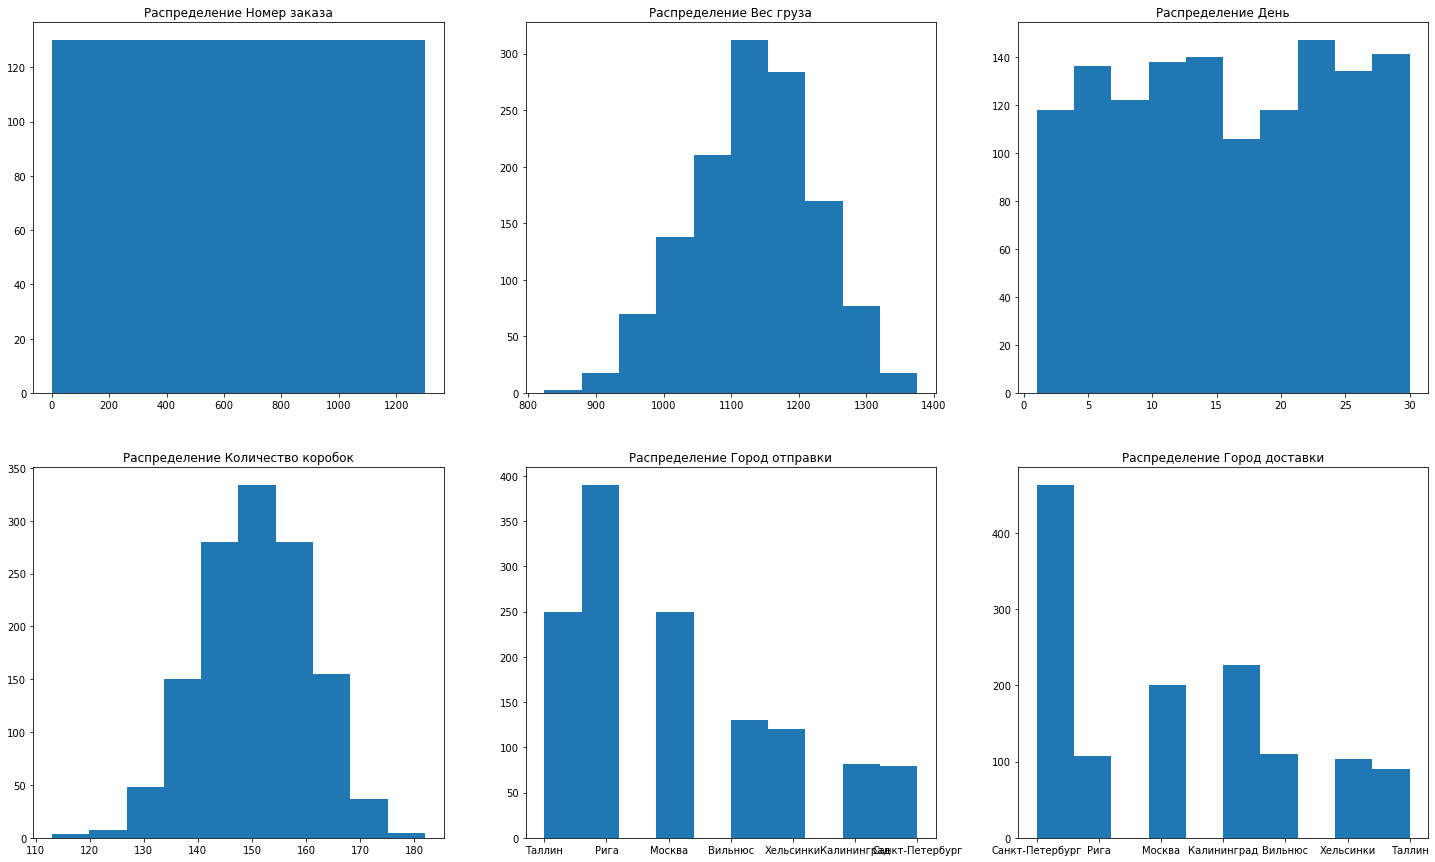

In [258]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

for i, column in enumerate(sheet.columns):
    ax = axes[i // 3, i % 3]
    ax.hist(sheet[column])
    ax.set_title("Распределение " + column)

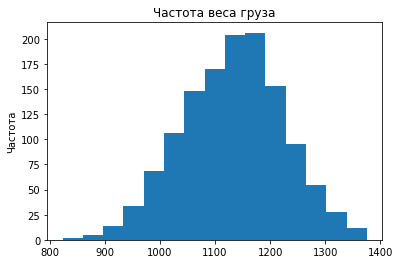

In [259]:
plt.hist(sheet['Вес груза'], 15)
plt.title('Частота веса груза')
plt.ylabel('Частота')

plt.show()

Сможет ли автомобиль грузоподъемностью 1.2 тонны может перевезти 140 коробок? Основные данные для анализа это вес груза и количество коробок

In [276]:
from scipy.stats import ttest_1samp

In [310]:
arr1 = sheet [sheet['Количество коробок'] >= 140]['Вес груза']
arr2 = sheet[sheet['Вес груза'] >= 1200][sheet['Вес груза'] < 1250]['Количество коробок']
print(arr2.mean())
print(arr2.std())
ttest_1samp(arr2, popmean=140)

159.0344827586207
6.163379216998855


<ipython-input-310-f653c54213c8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arr2 = sheet[sheet['Вес груза'] >= 1200][sheet['Вес груза'] < 1250]['Количество коробок']


Ttest_1sampResult(statistic=40.73772896219629, pvalue=1.3802716445195843e-90)

С помощью функции jointplot() видим совместное распределение по двум переменным.

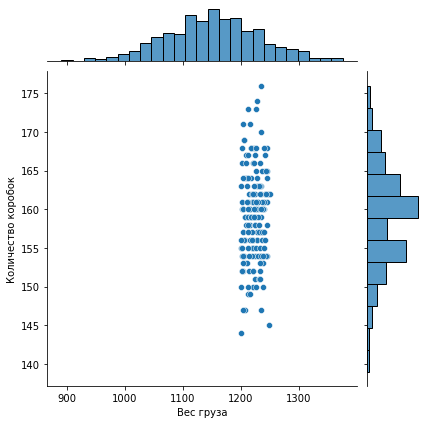

In [311]:
sns.jointplot(x=arr1, y=arr2, data=sheet, kind='scatter');

Проведя анализ данных, можно сделать вывод, что автомобиль грузоподъемностью 1.2 тонны может перевезти 140 коробок.